In [28]:
!pip install gradio -q

In [29]:
# Usual Libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

# Librosa (the mother of audio files)
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [30]:
general_path = '/content/drive/MyDrive/Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['classical', 'metal', 'hiphop', 'rock', 'pop', 'country', 'disco', 'reggae', 'blues', 'jazz']


In [31]:
import gradio as gr
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_agg import FigureCanvasAgg
import sklearn.preprocessing

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
def plot_audio_features(file,graph):
    # Load audio file
    y, sr = librosa.load(file.name)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)[0][0]
    tempo, _ = librosa.beat.beat_track(y=y, sr = sr)
    if (graph=="All"):
        # Compute features
        stft = np.abs(librosa.stft(y))
        spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
        spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
        spectrogram = librosa.amplitude_to_db(stft, ref=np.max)
        mel_spec = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000), ref=np.max)
        harmonic_percussive = librosa.effects.hpss(y)
        mfccs = librosa.feature.mfcc(y=y, sr=sr)
        # Computing the time variable for visualization
        frames = range(len(spectral_centroids))

        # Converts frame counts to time (seconds)
        t = librosa.frames_to_time(frames)
        # Set up the plot
        fig, ax = plt.subplots(nrows=8, sharex=True, figsize=(8,12))

        # Plot waveform
        librosa.display.waveshow(y, sr=sr, ax=ax[0], color='#FFB100',alpha=0.4)
        ax[0].set(title='Waveform')

        # Plot STFT
        librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='linear', ax=ax[1],cmap='coolwarm')
        ax[1].set(title='STFT (dB)')

        # Plot Spectrogram
        librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log', ax=ax[2],cmap='coolwarm')
        ax[2].set(title='Spectrogram (dB)')

        # Plot Mel Spectrogram
        librosa.display.specshow(mel_spec, sr=sr, x_axis='time', y_axis='mel', ax=ax[3],cmap='coolwarm')
        ax[3].set(title='Mel Spectrogram (dB)')

        # Plot Harmonics and Percussive components
        librosa.display.waveshow(harmonic_percussive[0], sr=sr, alpha=0.4, ax=ax[4], label='Harmonic',color='#FFB100')
        librosa.display.waveshow(harmonic_percussive[1], sr=sr, alpha=0.4, ax=ax[4], label='Percussive',color='#0F52BA')
        ax[4].legend(loc='upper right')
        ax[4].set(title='Harmonics and Percussive')
        #Plot the spectral centroids
        librosa.display.waveshow(y, sr=sr, alpha=0.4, color='#FFB100', ax=ax[5])
        ax[5].set(title='Waveform + Spectral centroids')
        ax[5].plot(t, normalize(spectral_centroids), color='#0F52BA',linewidth=0.7)
        #Plot the spectral RollOff
        librosa.display.waveshow(y, sr=sr, alpha=0.4, color='#FFB100', ax=ax[6])
        frames = range(len(rolloff))
        t = librosa.frames_to_time(frames)
        ax[6].set(title='Waveform + Spectral RollOff')
        ax[6].plot(t, normalize(rolloff), color='#0F52BA',linewidth=0.7)
        #Plot the MFCCs
        librosa.display.specshow(sklearn.preprocessing.scale(mfccs, axis=1), sr=sr, x_axis='time', cmap = 'coolwarm',ax=ax[7])
        ax[7].set(title='MFCCs')
        # Add space between subplots

        plt.subplots_adjust(hspace=0.7)
        canvas = FigureCanvasAgg(fig)
        canvas.draw()
        plot_image = np.array(canvas.renderer.buffer_rgba())
        plt.close(fig)
    elif (graph=="Waveform"):
        # Set up the plot
        fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(16,6))
        # Plot waveform
        librosa.display.waveshow(y, sr=sr, color='#FFB100',alpha=0.4)
        plt.title('Waveform', fontsize = 23)
        canvas = FigureCanvasAgg(fig)
        canvas.draw()
        plot_image = np.array(canvas.renderer.buffer_rgba())
        plt.close(fig)
    elif (graph=="Short-time Fourier Transform (STFT)"):
        # Set up the plot
        fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(16,6))
        stft = np.abs(librosa.stft(y))
        # Plot STFT
        plt.plot(stft)
        plt.title('STFT (dB)', fontsize = 23)
        canvas = FigureCanvasAgg(fig)
        canvas.draw()
        plot_image = np.array(canvas.renderer.buffer_rgba())
        plt.close(fig)
    elif (graph=="Spectrogram"):
        # Set up the plot
        fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(16,6))
        stft = np.abs(librosa.stft(y))
        spectrogram = librosa.amplitude_to_db(stft, ref=np.max)
        
        # Plot spectrogram
        librosa.display.specshow(spectrogram, sr=sr, x_axis='time', y_axis='log',cmap='coolwarm')
        plt.title('Spectrogram (dB)', fontsize = 23)
        canvas = FigureCanvasAgg(fig)
        canvas.draw()
        plot_image = np.array(canvas.renderer.buffer_rgba())
        plt.close(fig)
    elif (graph=="Mel Spectrogram"):
        # Set up the plot
        fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(16,6))
        mel_spec = librosa.amplitude_to_db(librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000), ref=np.max)
        # Plot Mel spectrogram
        librosa.display.specshow(mel_spec, sr=sr, x_axis='time', y_axis='log', cmap='coolwarm')
        plt.title('Mel Spectrogram (dB)', fontsize = 23)
        canvas = FigureCanvasAgg(fig)
        canvas.draw()
        plot_image = np.array(canvas.renderer.buffer_rgba())
        plt.close(fig)
    elif (graph=="Harmonics and Percussives"):
        # Set up the plot
        fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(16,6))
        harmonic_percussive = librosa.effects.hpss(y)
        # Plot Mel spectrogram
        librosa.display.waveshow(harmonic_percussive[0], sr=sr, alpha=0.4,  label='Harmonic',color='#FFB100')
        librosa.display.waveshow(harmonic_percussive[1], sr=sr, alpha=0.4,  label='Percussive',color='#0F52BA')
        plt.legend(loc='upper right')
        plt.title('Harmonics and Percussive', fontsize = 23)
        canvas = FigureCanvasAgg(fig)
        canvas.draw()
        plot_image = np.array(canvas.renderer.buffer_rgba())
        plt.close(fig)
    elif (graph=="Spectral Centroids"):
        # Set up the plot
        fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(16,6))
        spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
        # Computing the time variable for visualization
        frames = range(len(spectral_centroids))

        # Converts frame counts to time (seconds)
        t = librosa.frames_to_time(frames)
        # Plot Mel spectrogram
        librosa.display.waveshow(y, sr=sr, alpha=0.4, color='#FFB100')
        plt.plot(t, normalize(spectral_centroids), color='#0F52BA',linewidth=0.7)
        plt.title('Waveform + Spectral centroids', fontsize = 23)
        canvas = FigureCanvasAgg(fig)
        canvas.draw()
        plot_image = np.array(canvas.renderer.buffer_rgba())
        plt.close(fig)
    elif (graph=="Spectral Rolloffs"):
        # Set up the plot
        fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(16,6))
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
        # Computing the time variable for visualization
        frames = range(len(rolloff))

        # Converts frame counts to time (seconds)
        t = librosa.frames_to_time(frames)
        # Plot Mel spectrogram
        librosa.display.waveshow(y, sr=sr, alpha=0.4, color='#FFB100')
        plt.plot(t, normalize(rolloff), color='#0F52BA',linewidth=0.7)
        plt.title('Waveform + Spectral RollOff', fontsize = 23)
        canvas = FigureCanvasAgg(fig)
        canvas.draw()
        plot_image = np.array(canvas.renderer.buffer_rgba())
        plt.close(fig)
    elif (graph=="Mel-Frequency Cepstral Coefficients(MFCCs)"):
        # Set up the plot
        fig, ax = plt.subplots(nrows=1, sharex=True, figsize=(16,6))
        mfccs = librosa.feature.mfcc(y=y, sr=sr)
        # Plot Mel spectrogram
        librosa.display.specshow(sklearn.preprocessing.scale(mfccs, axis=1), sr=sr, x_axis='time', cmap = 'coolwarm')
        plt.title('MFCCs', fontsize = 23)
        canvas = FigureCanvasAgg(fig)
        canvas.draw()
        plot_image = np.array(canvas.renderer.buffer_rgba())
        plt.close(fig)
    return plot_image, zero_crossing_rate, tempo


graph_options = ["All", "Waveform", "Short-time Fourier Transform (STFT)", "Spectrogram", "Mel Spectrogram", "Harmonics and Percussives", "Spectral Centroids", "Spectral Rolloffs","Mel-Frequency Cepstral Coefficients(MFCCs)"]
graph_dropdown = gr.inputs.Dropdown(graph_options, label="Select a graph to display")
im=gr.outputs.Image(type="numpy", label="Graphs")
inputs = [gr.inputs.File(label="Upload audio file (WAV format)"), graph_dropdown]
outputs = [im, gr.outputs.Label(label="Zero Crossing Rate"),gr.outputs.Label(label="Tempo")]
title = "Audio Analysis Dashboard"
description = "## Audio Feature Analysis\n\nUpload an audio file to visualize the following features:- Waveform- Short-time Fourier Transform (STFT)- Spectrogram- Mel Spectrogram- Harmonics and Percussives- Spectral Centroids- Spectral Rolloffs"
gr.Interface(fn=plot_audio_features, inputs=inputs, outputs=outputs, title=title, description=description).launch()


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [32]:
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [33]:
import plotly.express as px
import pandas as pd

# Example data


# Compute correlation matrix
corr = data.corr()

# Plot heatmap
fig = px.imshow(corr,
                x=corr.columns,
                y=corr.columns,
                color_continuous_scale='RdBu',
                zmin=-1,
                zmax=1
                )
fig.update_layout(width=1200, height=1000)

fig.show()


In [34]:
from sklearn import preprocessing
data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.26745621, 0.18238003])

Text(0, 0.5, 'Principal Component 2')

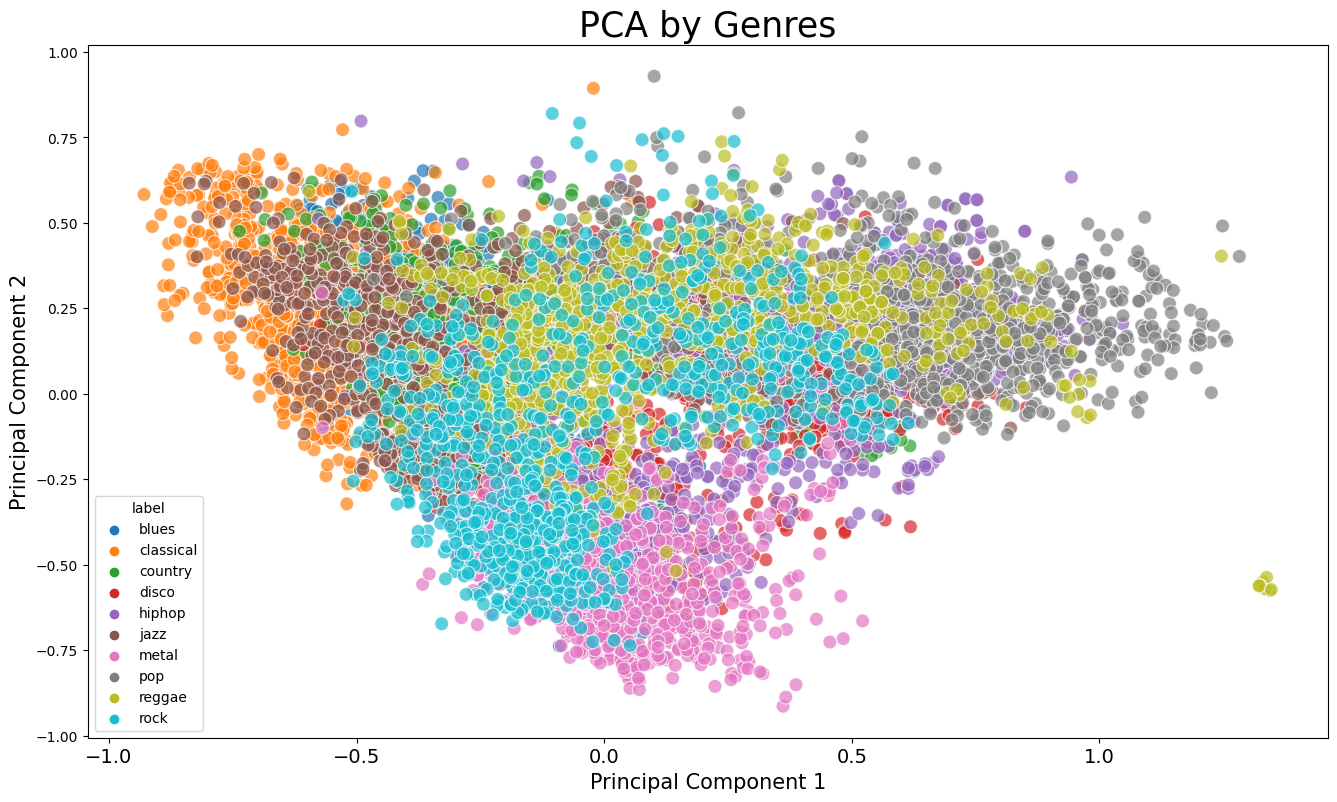

In [35]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA by Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

In [36]:
finalDf.head()

,principal component 1,principal component 2,label
0,-0.242167,-0.121147,blues
1,-0.276062,-0.230291,blues
2,-0.190024,-0.119509,blues
3,-0.278550,-0.167689,blues
4,-0.309771,-0.187990,blues


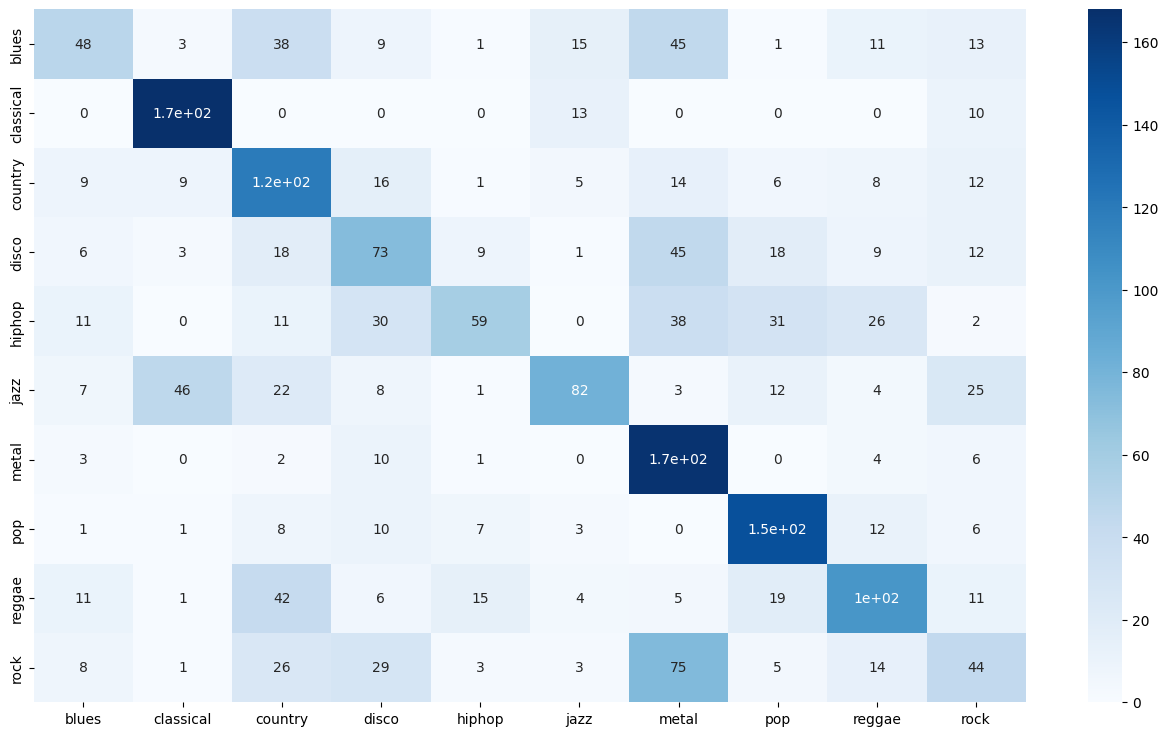

 The accuracy of Naive Bayes  : 0.50501 
 


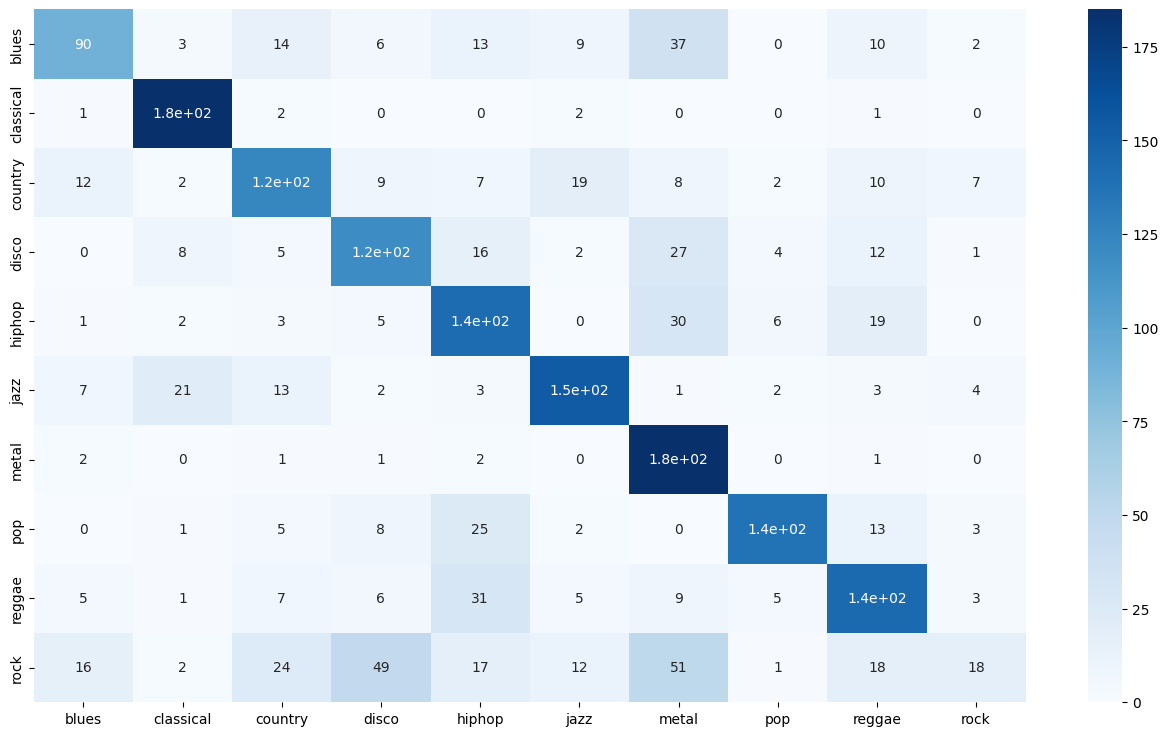

 The accuracy of Stochastic Gradient Descent  : 0.65015 
 


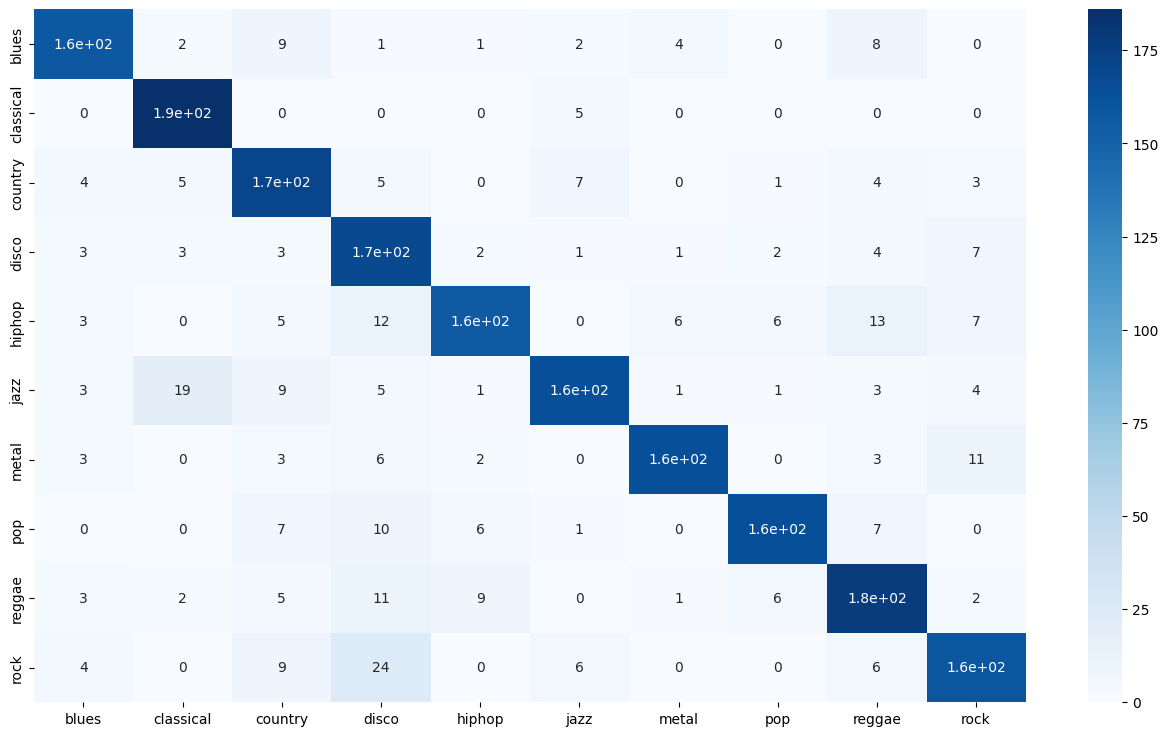

 The accuracy of KNN  : 0.83383 
 


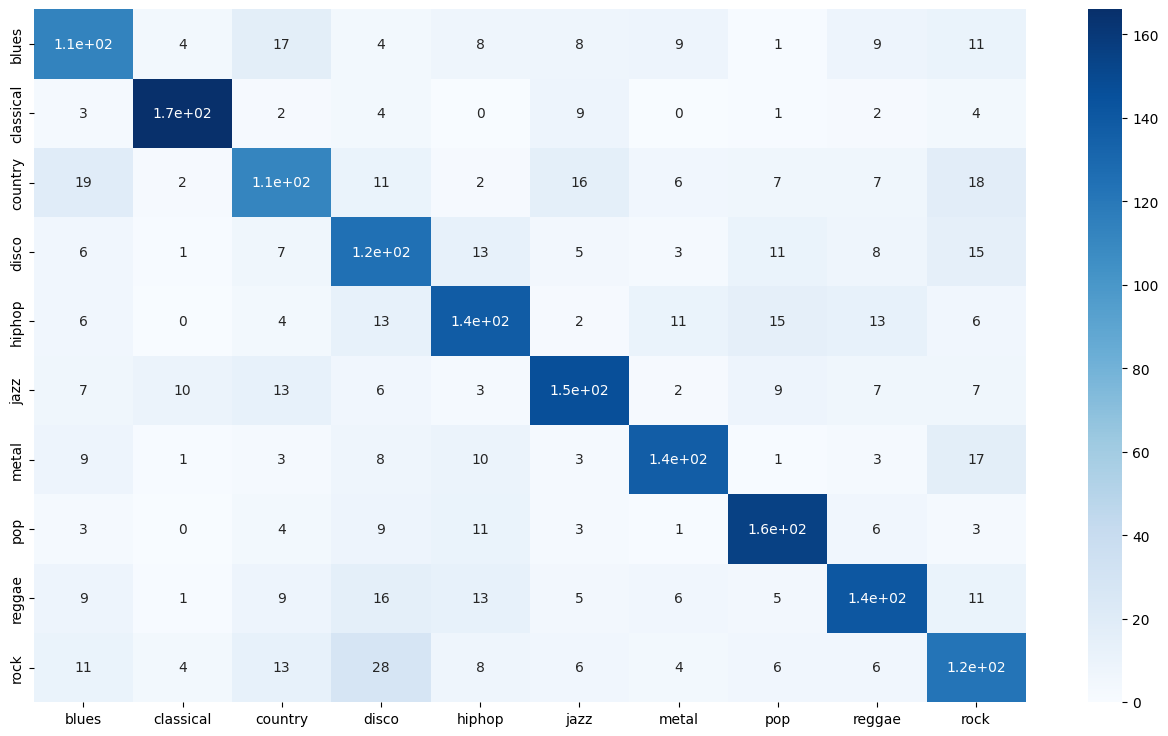

 The accuracy of Decission trees  : 0.67818 
 


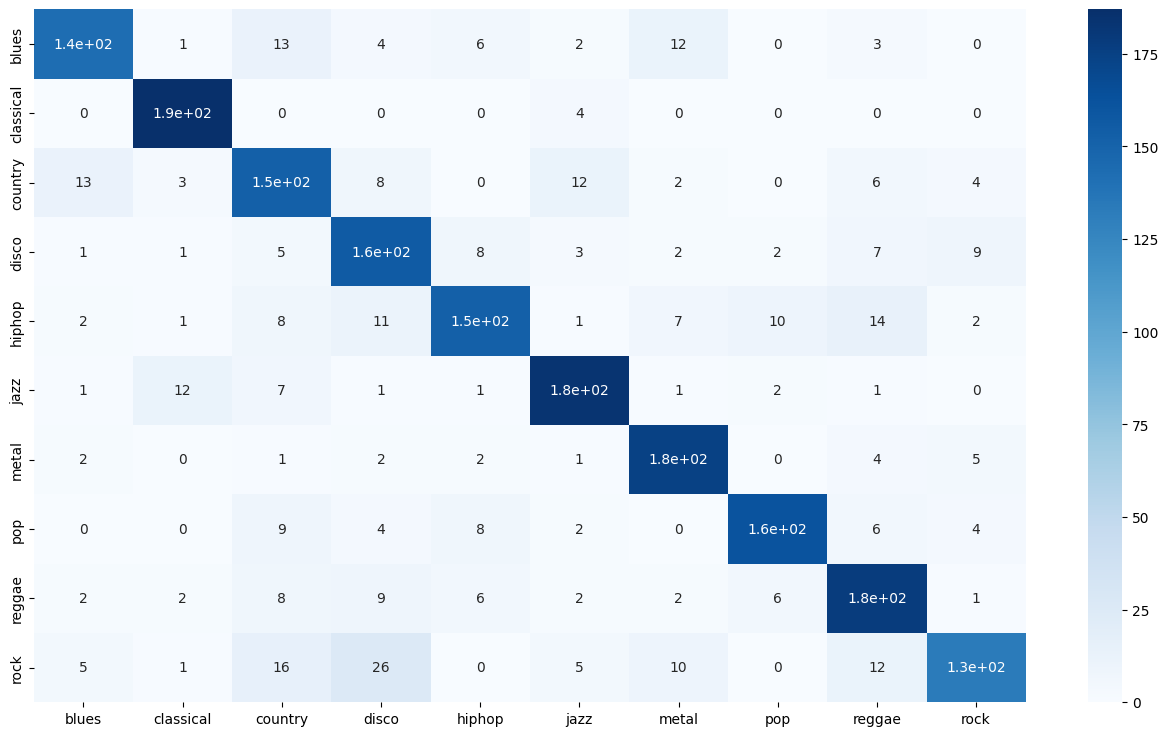

 The accuracy of Random Forest  : 0.81181 
 


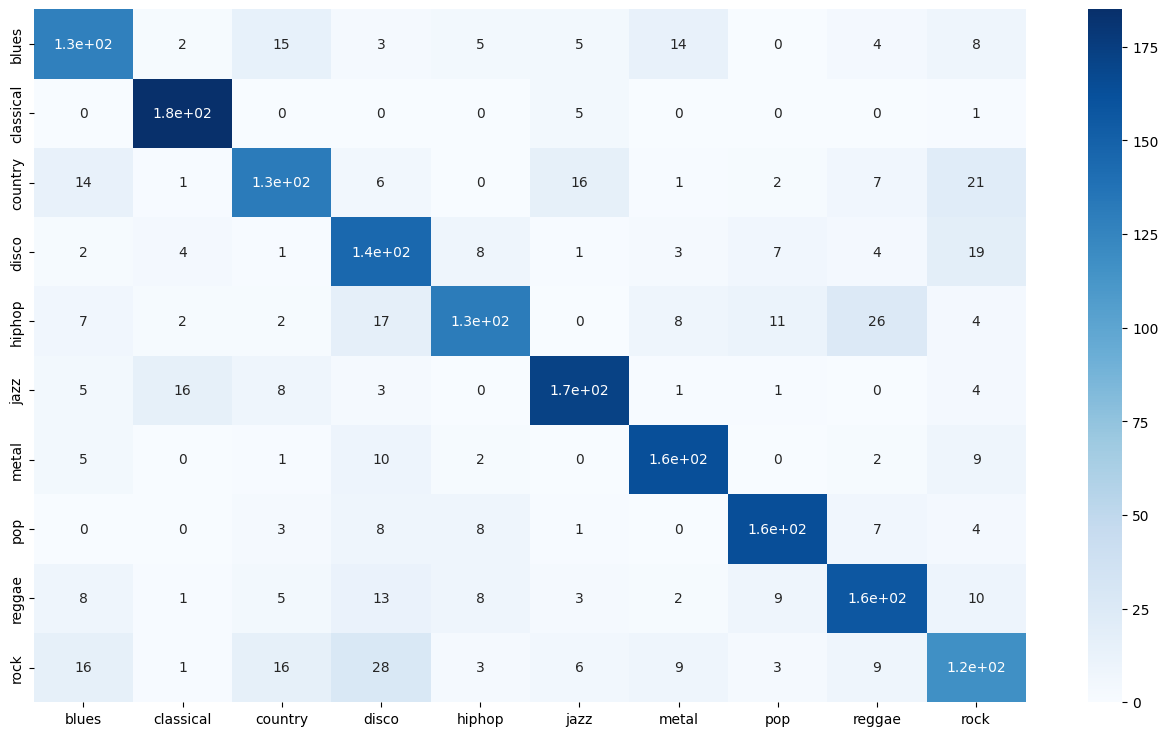

 The accuracy of Support Vector Machine  : 0.74775 
 


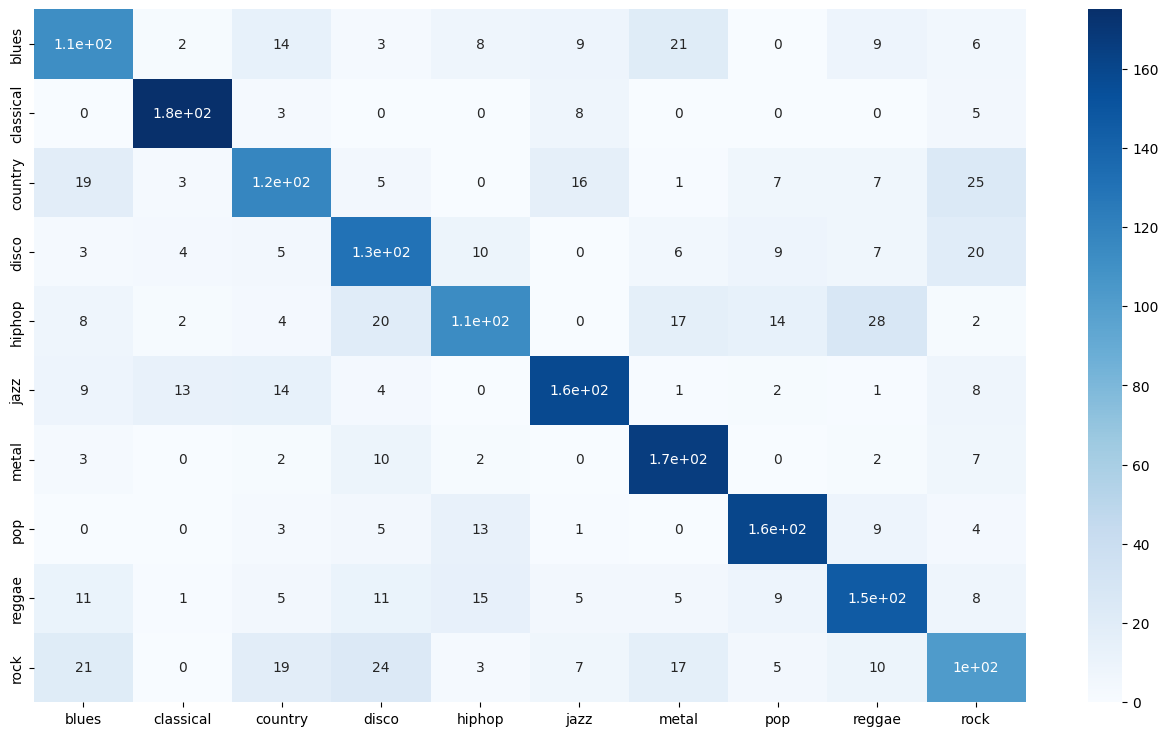

 The accuracy of Logistic Regression  : 0.69019 
 


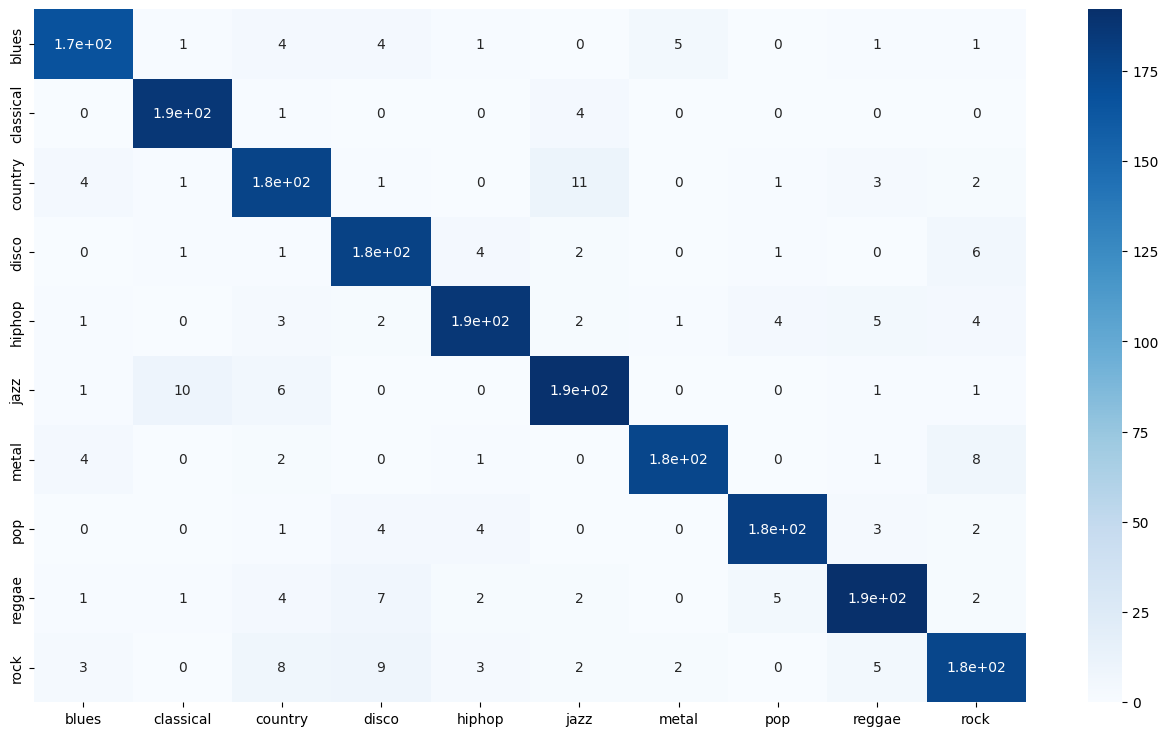

 The accuracy of XG Booster  : 0.90641 
 


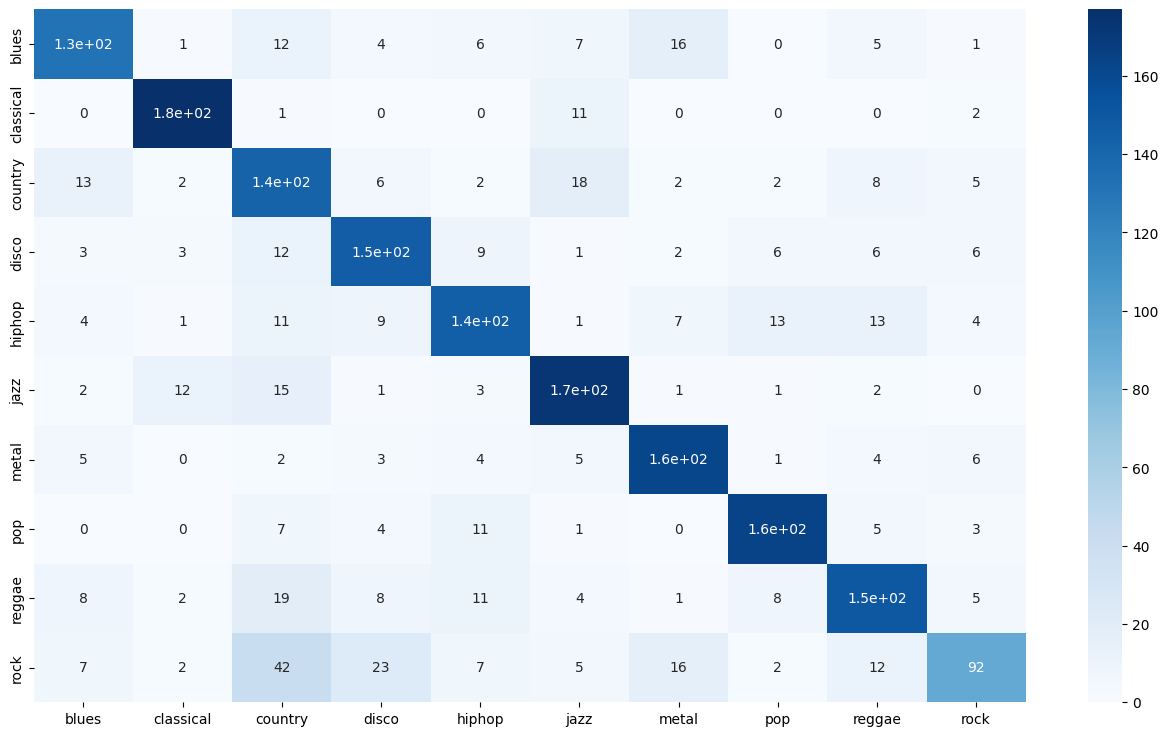

 The accuracy of Cross Gradient Booster (Random Forest)  : 0.74224 
 


In [37]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y = data['label'] # genre variable.
y = label_encoder.fit_transform(y)
X = data.loc[:, data.columns != 'label'] #select all columns but not the labels

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)

# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
models={
        "Naive Bayes":GaussianNB(),
        "Stochastic Gradient Descent":SGDClassifier(max_iter=5000, random_state=12),
        "KNN":KNeighborsClassifier(n_neighbors=17),
        "Decission trees":DecisionTreeClassifier(),
        "Random Forest":RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=12),
        "Support Vector Machine":SVC(decision_function_shape="ovo"),
        "Logistic Regression":LogisticRegression(random_state=12, solver='lbfgs', multi_class='multinomial'),
        "XG Booster":XGBClassifier(n_estimators=1000, learning_rate=0.05),
        "Cross Gradient Booster (Random Forest)":XGBRFClassifier(objective= 'multi:softmax')
}
name_list = list(models.keys())
model_list = list(models.values())
for i in range(len(model_list)):
    model_list[i].fit(X_train, y_train)
    preds = model_list[i].predict(X_test)
    confusion_matr = confusion_matrix(y_test, preds) #normalize = 'true'
    plt.figure(figsize = (16, 9))
    sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
                xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
              yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
    plt.show()
    print(f'\033[1;33m The accuracy of {name_list[i]}  : {round(accuracy_score(y_test, preds), 5)} \n \033[0m')

clearly xgboost is the best hitting 90% accuarcy and hence we will choose it as our model


In [38]:
from xgboost import XGBClassifier
model  = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [39]:
data

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [ ]:

row_id = 'rock.00000.9.wav'
row = data.loc[data['filename'] == row_id,data.columns != 'label']
# select the features used for prediction
row=row.drop([ 'length','filename'], axis=1)
np_scaled = min_max_scaler.fit_transform(row)

# new data frame with the new scaled data. 
row = pd.DataFrame(np_scaled, columns = row.columns)
# make the prediction using the model
prediction = model.predict(row)
probabilities = model.predict_proba(row)
# print the prediction and probabilities
print(f"Prediction: {label_encoder.inverse_transform(prediction)}")
print(f"Probabilities: {probabilities}")
preds = model.predict(X_train)
print(f'\033[1;33m The accuracy   : {round(accuracy_score(y_train, preds), 5)} \n \033[0m')


In [ ]:
X_train.head(1)
prediction=model.predict(X_train.head(1))
print(label_encoder.inverse_transform(prediction))
y_train[0]

In [43]:
from sklearn.preprocessing import MinMaxScaler
data = pd.read_csv(f'{general_path}/features_3_sec.csv')
# Extract the row with the desired ID
row_id = 'blues.00000.9.wav'
row = data.loc[data['filename'] == row_id, data.columns != 'label']
row = row.iloc[0:, 1:]
data = data.iloc[0:, 1:]


# Fit the scaler on the entire dataset
scaler = MinMaxScaler().fit(data.drop([ 'label'], axis=1))

# Transform the row using the fitted scaler
row_scaled = scaler.transform(row)

# Make the prediction using the model
prediction = model.predict(row_scaled)

# Print the prediction
print(label_encoder.inverse_transform(prediction)[0])


blues


In [44]:
from sklearn.preprocessing import MinMaxScaler

def predict_genre(row_id, model, label_encoder):
    data = pd.read_csv(f'{general_path}/features_3_sec.csv')
    # Extract the row with the desired ID
    row = data.loc[data['filename'] == row_id, data.columns != 'label']
    row = row.iloc[0:, 1:]
    data = data.iloc[0:, 1:]
    # Fit the scaler on the entire dataset
    scaler = MinMaxScaler().fit(data.drop(['label'], axis=1))
    # Transform the row using the fitted scaler
    row_scaled = scaler.transform(row)
    # Make the prediction using the model
    prediction = model.predict(row_scaled)
    # Return the prediction
    return label_encoder.inverse_transform(prediction)[0]
row_id = 'blues.00000.9.wav'
predicted_genre = predict_genre(row_id, model, label_encoder)
print(predicted_genre)


blues
